<a href="https://colab.research.google.com/github/AnishmMore/8puzzleproblem/blob/main/The_Eight_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq
import time
import matplotlib.pyplot as plt

In [2]:
def misplaced_tiles(cost):
    count = 0
    n = len(cost)
    for i in range(n):
        for j in range(n):
            if cost[i][j] != 0 and cost[i][j] != i * n + j + 1:
                count += 1
    return count

In [3]:
def manhattan_distance(cost):
    n = len(cost)
    count = 0

    for i in range(n):
        for j in range(n):
            if cost[i][j] != 0:
                r, c = divmod(cost[i][j] - 1, n)
                if r != i or c != j:
                    count += abs(r - i) + abs(c - j)
    return count


In [8]:
def general_search(problem, algorithm):                     #function general-search(problem, algo)
    start_time = time.time()
    root = (0, 0, problem)  # storing cost, depth, and the puzzle state in root node
    queue = [root]         #nodes=make-queue(make-Node(initial state))
    visited = set()  #all visited states
    max_queue_size = 0
    expanded = 0

    
    def queueing_function(node, operator):
      nonlocal max_queue_size
      for _ in operator:
        heapq.heappush(node,_)
      max_queue_size = max(max_queue_size, len(node))
      return node

    while queue:                                    #loop do
        current = heapq.heappop(queue)               #node= remove-front(nodes)
        print(f"\nThe best state to expand with g(n) = {int(current[0])} and h(n) = {int(current[1])} is...")

        expanded_list = current[2]
        for ele in expanded_list:
            print(ele)
        expanded += 1
        visited.add(tuple(tuple(row) for row in current[2]))

        if current[2] == goal:               #if problem.Goal-Test succeeds then return node.
            end_time = time.time()
            total_time = end_time - start_time
            print("\nGoal state!!")
            return current[1], expanded, total_time, max_queue_size

        queue = queueing_function(queue, expansion(current, algorithm, visited)) #nodes=Queuing-function(nodes,problem.operators)
    
    print("No solution found")  #this is if empty(nodes) then we will return failure
    return -1


In [9]:
def move(curr_puzzle, row, col, new_row, new_col):
    new_puzzle = [list(row) for row in curr_puzzle]
    new_puzzle[row][col], new_puzzle[new_row][new_col] = new_puzzle[new_row][new_col], new_puzzle[row][col]
    return new_puzzle

In [10]:
def expansion(parent_node, algo, visited):
    child_states = []
    
    cost = parent_node[0]
    depth = parent_node[1]
    curr_puzzle = parent_node[2]
    
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
    
    for i in range(len(curr_puzzle)):
        for j in range(len(curr_puzzle[0])):
            if curr_puzzle[i][j] == 0:
                empty_row, empty_col = i, j
    
    for direction in directions:
        new_row = empty_row + direction[0]
        new_col = empty_col + direction[1]
        if 0 <= new_row < len(curr_puzzle) and 0 <= new_col < len(curr_puzzle[0]):
            new_state = move(curr_puzzle, empty_row, empty_col, new_row, new_col)
            new_state_tuple = tuple(map(tuple, new_state))

            if new_state_tuple not in visited and new_state_tuple != tuple(map(tuple, parent_node[2])):
                child_states.append((cost, depth + 1, new_state))
                visited.add(new_state_tuple)
    
    final = []
    cost_functions = {
        1: lambda x: x[0] + 1,
        2: lambda x: x[0]+ 1+ misplaced_tiles(x[2]) ,
        3: lambda x:  x[0]+ 1+ manhattan_distance(x[2]) 
    }
    
    final = list(map(lambda x: (cost_functions[algo](x), depth + 1, x[2]), child_states))
      
    return final


In [11]:
goal = [[1,2,3],[4,5,6],[7,8,0]] #goal state for 8 puzzle
#goal = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,0]] #goal state for 15 puzzle
#goal = [[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,0]] #goal state for 25 puzzle

def main():
    def print_matrix(matrix):
      rows = len(matrix)
      cols = len(matrix[0])
      for row in range(rows):
          for col in range(cols):
              print(matrix[row][col], end=" ")
          print()

    print('------------------------')
    print("|e-i-g-h-t- -p-u-z-z-l-e|")
    print('------------------------')
    print("Welcome to the 8-puzzle solver! To select the default puzzle, press (1), To create your own puzzle, press (2).")
    
    press = int(input())
    if(press==1):
        
        puzzle = [[0, 1, 2], [4, 5, 3], [7, 8, 6]] #puzzle initial state for 8 puzzle
        #puzzle= [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,0,15]] #puzzle initial state for 15 puzzle
        #puzzle= [[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 0, 24]]
        print("\nThe default puzzle is represented by a 3x3 matrix and looks something like this\n")
        print_matrix(puzzle)
        print()
      
    elif(press==2):
        
        print("Please enter the size for puzzle,(3) for 8-puzzle problem,(4) for 15-puzzle problem, (5) for 25-puzzle problem\n")
        print("Did you specify the goal state for the corresponding puzzle in the first line of code?")
        n = int(input())
        
        print("Please enter the elements of the puzzle one by one. Use 0 to represent a blank element.")
        curr = []
        for i in range(n):
            row = []
            for j in range(n):
                while True:
                    try:
                        element = int(input())
                        if element < 0 or element > 8:
                            print("Invalid input. Please enter a number between 0 and 8.")
                        else:
                            break
                    except ValueError:
                        print("Invalid input. Please enter a number between 0 and 8.")
                row.append(element)
            curr.append(row)

        print("\n")
        print("The created puzzle is represented by a 3x3 matrix and looks something like this \n")
        print_matrix(curr)
        print(" ")
            
    
    
    print("Select algorithm (1) for Uniform Cost Search, (2) for A* with the Misplaced Tile heuristic, (3) for A* with Manhattan Distance heuristic\n")
    
    method = int(input())
    d, expand,final_time,max_sz = general_search(puzzle if press == 1 else curr, method)
    
    print()
    print("Solution depth was: " + str(d))
    print("Number of nodes expanded: " + str(expand))
    print("Max Queue size: " + str(max_sz))
    print("Time: "+ str(final_time))
    
if __name__ == "__main__":
    main()    

------------------------
|e-i-g-h-t- -p-u-z-z-l-e|
------------------------
Welcome to the 8-puzzle solver! To select the default puzzle, press (1), To create your own puzzle, press (2).
1

The default puzzle is represented by a 3x3 matrix and looks something like this

0 1 2 
4 5 3 
7 8 6 

Select algorithm (1) for Uniform Cost Search, (2) for A* with the Misplaced Tile heuristic, (3) for A* with Manhattan Distance heuristic

3

The best state to expand with g(n) = 0 and h(n) = 0 is...
[0, 1, 2]
[4, 5, 3]
[7, 8, 6]

The best state to expand with g(n) = 4 and h(n) = 1 is...
[1, 0, 2]
[4, 5, 3]
[7, 8, 6]

The best state to expand with g(n) = 6 and h(n) = 1 is...
[4, 1, 2]
[0, 5, 3]
[7, 8, 6]

The best state to expand with g(n) = 7 and h(n) = 2 is...
[1, 2, 0]
[4, 5, 3]
[7, 8, 6]

The best state to expand with g(n) = 9 and h(n) = 2 is...
[1, 5, 2]
[4, 0, 3]
[7, 8, 6]

The best state to expand with g(n) = 9 and h(n) = 3 is...
[1, 2, 3]
[4, 5, 0]
[7, 8, 6]

The best state to expand with g(


Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!
Uniform Cost Search:
Depth levels: [1 2 4 8]
Expanded nodes: [  4   6  19 229]
Time taken: [0.00015879 0.00012589 0.00059152 0.03251886]
Max queue size: [  5   6  18 137]
Misplaced Tiles Heuristic:
Depth levels: [1 2 4 8]
Expanded nodes: [ 2  3  7 63]
Time taken: [5.72204590e-05 6.60419464e-05 1.97410583e-04 8.59355927e-03]
Max queue size: [ 3  3  7 50]
Manhattan Distance Heuristic:
Depth levels: [1 2 4 8]
Expanded nodes: [ 2  3  7 37]
Time taken: [7.53402710e-05 7.46250153e-05 2.17199326e-04 1.35135651e-03]
Max queue size: [ 3  3  7 29]


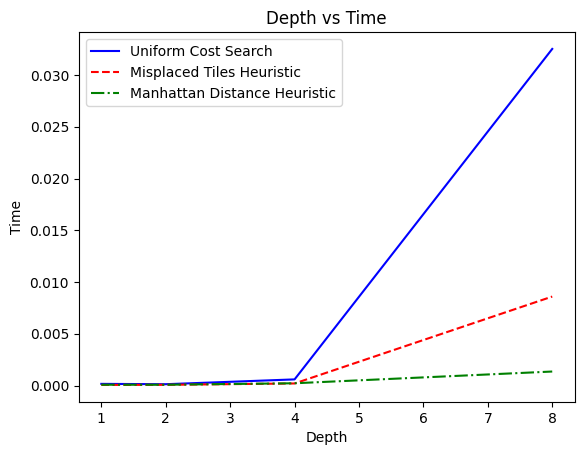

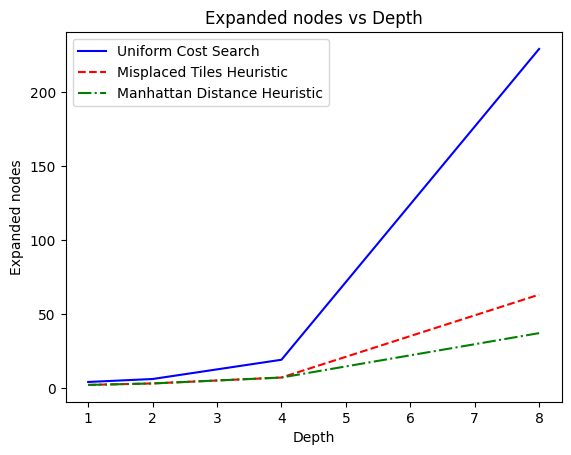

In [242]:
import numpy as np
import matplotlib.pyplot as plt

puzzles = [
    [[1, 2, 3], [4, 5, 6], [7, 0, 8]],
    [[1, 2, 0], [4, 5, 3], [7, 8, 6]],
    [[0, 1, 2], [4, 5, 3], [7, 8, 6]],
    [[1, 3, 6], [5, 0, 2], [4, 7, 8]], 
]

depths = []
expansions = []
times = []
max_sizes = []


for puzzle in puzzles:
    # The Uniform Cost Search algorithm
    d_uni, expand_uni, final_time_uni, max_sz_uni = general_search(puzzle, 1)
    depths.append(d_uni)
    expansions.append(expand_uni)
    times.append(final_time_uni)
    max_sizes.append(max_sz_uni)

    # The Misplaced Tiles Heuristic algorithm
    d_misplace, expand_misplace, final_time_misplace, max_sz_misplace = general_search(puzzle, 2)
    depths.append(d_misplace)
    expansions.append(expand_misplace)
    times.append(final_time_misplace)
    max_sizes.append(max_sz_misplace)

    # The Manhattan Distance Heuristic algorithm
    d_manhatt, expand_manhatt, final_time_manhatt, max_sz_manhatt = general_search(puzzle, 3)
    depths.append(d_manhatt)
    expansions.append(expand_manhatt)
    times.append(final_time_manhatt)
    max_sizes.append(max_sz_manhatt)


depths = np.array(depths).reshape((len(puzzles), 3))
expansions = np.array(expansions).reshape((len(puzzles), 3))
times = np.array(times).reshape((len(puzzles), 3))
max_sizes = np.array(max_sizes).reshape((len(puzzles), 3))

print("Uniform Cost Search:")
print("Depth levels:", depths[:, 0])
print("Expanded nodes:", expansions[:, 0])
print("Time taken:", times[:, 0])
print("Max queue size:", max_sizes[:, 0])

print("Misplaced Tiles Heuristic:")
print("Depth levels:", depths[:, 1])
print("Expanded nodes:", expansions[:, 1])
print("Time taken:", times[:, 1])
print("Max queue size:", max_sizes[:, 1])

print("Manhattan Distance Heuristic:")
print("Depth levels:", depths[:, 2])
print("Expanded nodes:", expansions[:, 2])
print("Time taken:", times[:, 2])
print("Max queue size:", max_sizes[:, 2])


plt.plot(depths[:, 0], times[:, 0], label="Uniform Cost Search", color="blue", linestyle="-")
plt.plot(depths[:, 1], times[:, 1], label="Misplaced Tiles Heuristic", color="red", linestyle="--")
plt.plot(depths[:, 2], times[:, 2], label="Manhattan Distance Heuristic", color="green", linestyle="-.")
plt.title("Depth vs Time")
plt.xlabel("Depth")
plt.ylabel("Time")
plt.legend()
plt.show()

print()

plt.plot(depths[:, 0], expansions[:, 0], label="Uniform Cost Search", color="blue", linestyle="-")
plt.plot(depths[:, 1], expansions[:, 1], label="Misplaced Tiles Heuristic", color="red", linestyle="--")
plt.plot(depths[:, 2], expansions[:, 2], label="Manhattan Distance Heuristic", color="green", linestyle="-.")
plt.title("Expanded nodes vs Depth")
plt.xlabel("Depth")
plt.ylabel("Expanded nodes")
plt.legend()
plt.show() 


Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!

Goal state!!
Uniform Cost Search:
Depth levels: [ 0  2  4  8 12 16 20 24]
Expanded nodes: [     1      6     26    229   1615  10224  41250 121104]
Time taken: [1.66893005e-05 1.61647797e-04 7.11202621e-04 1.26445293e-02
 9.46080685e-02 1.53051591e+00 3.47204041e+00 4.60450959e+00]
Max queue size: [    0     6    18   137   964  5482 16993 24051]
Misplaced Tiles Heuristic:
Depth levels: [ 0  2  4  8 12 16 22 24]
Expanded nodes: [    1     3    11    63   539  2873  9834 57800]
Time taken: [1.66893005e-05 9.89437103e-05 3.37839127e-04 1.88398361e-03
 4.87623215e-02 1.63966656e-01 6.86335325e-01 2.64140201e+00]
Max queue size: [    0     3     9    50   343  1726  5303 1

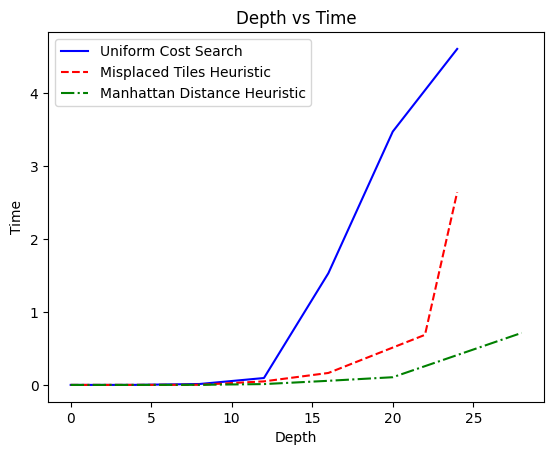

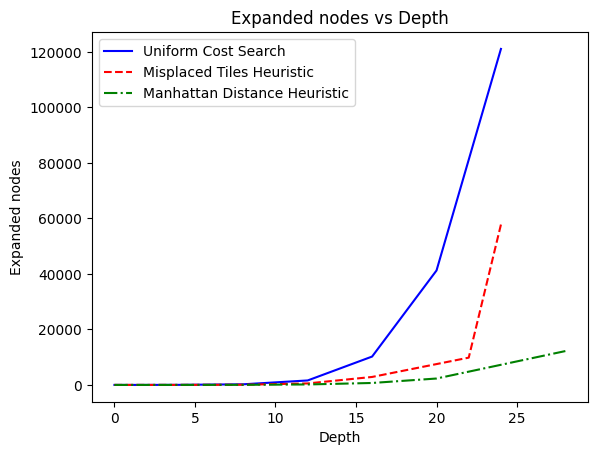

In [243]:
import numpy as np
import matplotlib.pyplot as plt

puzzles = [
    [[1, 2, 3], [4, 5, 6], [7, 8, 0]],
    [[1, 2, 3], [4, 5, 6], [0, 7, 8]],
    [[1, 2, 3], [5, 0, 6], [4, 7, 8]],
    [[1, 3, 6], [5, 0, 2], [4, 7, 8]],
    [[1, 3, 6], [5, 0, 7], [4, 8, 2]],
    [[1, 6, 7], [5, 0, 3], [4, 8, 2]],
    [[7, 1, 2], [4, 8, 5], [6, 3, 0]],
    [[0, 7, 2], [4, 6, 1], [3, 5, 8]]      
]

depths = []
expansions = []
times = []
max_sizes = []


for puzzle in puzzles:
    # The Uniform Cost Search algorithm
    d_uni, expand_uni, final_time_uni, max_sz_uni = general_search(puzzle, 1)
    depths.append(d_uni)
    expansions.append(expand_uni)
    times.append(final_time_uni)
    max_sizes.append(max_sz_uni)

    # The Misplaced Tiles Heuristic algorithm
    d_misplace, expand_misplace, final_time_misplace, max_sz_misplace = general_search(puzzle, 2)
    depths.append(d_misplace)
    expansions.append(expand_misplace)
    times.append(final_time_misplace)
    max_sizes.append(max_sz_misplace)

    # The Manhattan Distance Heuristic algorithm
    d_manhatt, expand_manhatt, final_time_manhatt, max_sz_manhatt = general_search(puzzle, 3)
    depths.append(d_manhatt)
    expansions.append(expand_manhatt)
    times.append(final_time_manhatt)
    max_sizes.append(max_sz_manhatt)


depths = np.array(depths).reshape((len(puzzles), 3))
expansions = np.array(expansions).reshape((len(puzzles), 3))
times = np.array(times).reshape((len(puzzles), 3))
max_sizes = np.array(max_sizes).reshape((len(puzzles), 3))

print("Uniform Cost Search:")
print("Depth levels:", depths[:, 0])
print("Expanded nodes:", expansions[:, 0])
print("Time taken:", times[:, 0])
print("Max queue size:", max_sizes[:, 0])

print("Misplaced Tiles Heuristic:")
print("Depth levels:", depths[:, 1])
print("Expanded nodes:", expansions[:, 1])
print("Time taken:", times[:, 1])
print("Max queue size:", max_sizes[:, 1])

print("Manhattan Distance Heuristic:")
print("Depth levels:", depths[:, 2])
print("Expanded nodes:", expansions[:, 2])
print("Time taken:", times[:, 2])
print("Max queue size:", max_sizes[:, 2])


plt.plot(depths[:, 0], times[:, 0], label="Uniform Cost Search", color="blue", linestyle="-")
plt.plot(depths[:, 1], times[:, 1], label="Misplaced Tiles Heuristic", color="red", linestyle="--")
plt.plot(depths[:, 2], times[:, 2], label="Manhattan Distance Heuristic", color="green", linestyle="-.")
plt.title("Depth vs Time")
plt.xlabel("Depth")
plt.ylabel("Time")
plt.legend()
plt.show()

print()

plt.plot(depths[:, 0], expansions[:, 0], label="Uniform Cost Search", color="blue", linestyle="-")
plt.plot(depths[:, 1], expansions[:, 1], label="Misplaced Tiles Heuristic", color="red", linestyle="--")
plt.plot(depths[:, 2], expansions[:, 2], label="Manhattan Distance Heuristic", color="green", linestyle="-.")
plt.title("Expanded nodes vs Depth")
plt.xlabel("Depth")
plt.ylabel("Expanded nodes")
plt.legend()
plt.show() 